In [1]:
import numpy as np
import serial
import time
from glob import glob
from os.path import basename
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io

## Load images to indicate gesture detected

In [2]:
img_up = io.imread('up_arrow.png')
img_left = io.imread('left_arrow.png')
img_front = io.imread('front_arrow.png')

def display(img_name):
    # Show image
    plt.figure(figsize=(1,1))
    plt.imshow(img_name)
    plt.axis('off')
    plt.show()

## Prepare training data

Each gesture training data is stored in a file. All these files are stored in a training folder.
Make a single training dataset from all files and do numeric encoding for label(gesture) so that it can be used in ML models like SVC.

In [3]:
def load_features(folder):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[6:-4]
        classmap[class_idx] = class_name
        samples = np.loadtxt(filename, dtype=float, delimiter=',')
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

## Train the model

In [4]:
features, classmap = load_features('dataset/')
X_train, y_train = features[:, :-1], features[:, -1]
classifier = SVC(kernel='linear').fit(X_train, y_train)

## Gesture recognition:

Read values from serial port and input them to the trained classifier. Display the predicted output.

Below displayed arrows were results of gesture recognition.

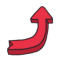

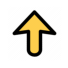

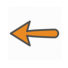

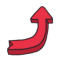

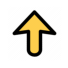

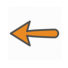

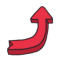

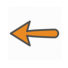

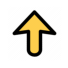

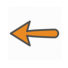

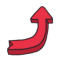

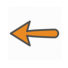

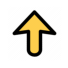

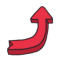

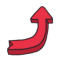

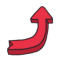

In [ ]:
#Serial takes these two parameters: serial device and baudrate
ser = serial.Serial('COM4', 9600)
while True:
    try:
        ser_bytes = ser.readline()
        val_list = ser_bytes.decode("utf-8").strip()
        val_list = val_list.split(',')
        val_list = [float(item) for item in val_list[:-1]]
        result=classifier.predict([val_list])
        if(result==0):
            display(img_front)
        elif(result==1):
            display(img_left)
        elif(result==2):
            display(img_up)
        else:
            print('No movement')
        
    except:
        print("Keyboard Interrupt")
        break